In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
df=pd.read_csv("Titanic_survival_data.csv")
df.head(80)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Sex
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1,female
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,1,male
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,1,male
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...
75,967,1,"Keeping, Mr. Edwin",32.5,0,0,113503,211.5000,C132,C,0,male
76,968,3,"Miles, Mr. Frank",NaN,0,0,359306,8.0500,NaN,S,0,male
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",55.0,2,0,11770,25.7000,C101,S,0,female
78,970,2,"Aldworth, Mr. Charles Augustus",30.0,0,0,248744,13.0000,NaN,S,1,male


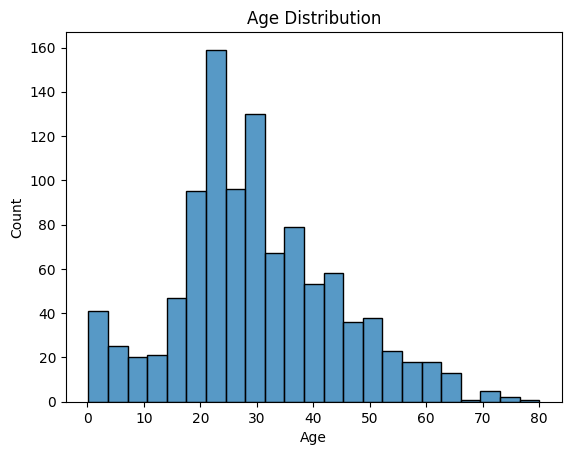

In [198]:
sns.histplot(df['Age'].dropna(), kde=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


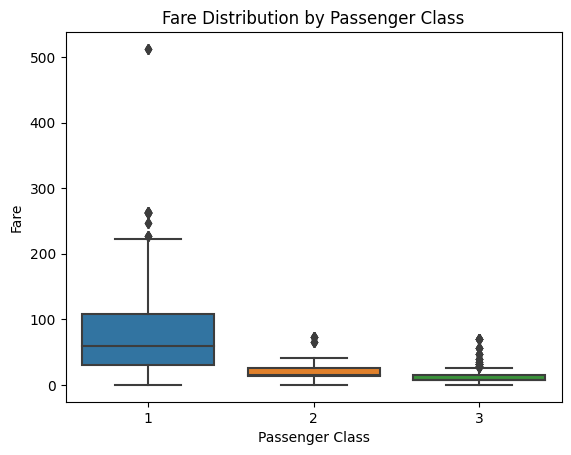

In [199]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()

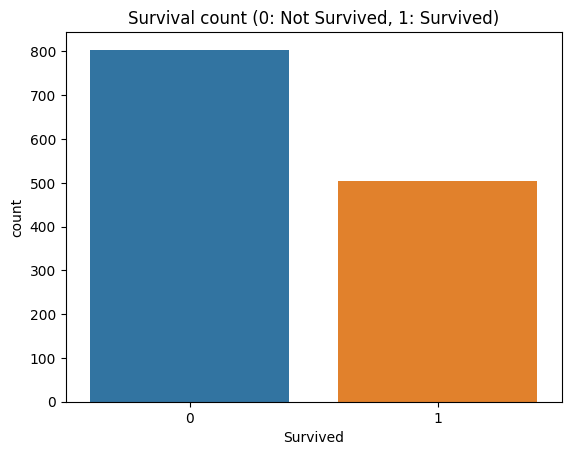

In [200]:
sns.countplot(x='Survived', data=df)
plt.title('Survival count (0: Not Survived, 1: Survived)')
plt.show()

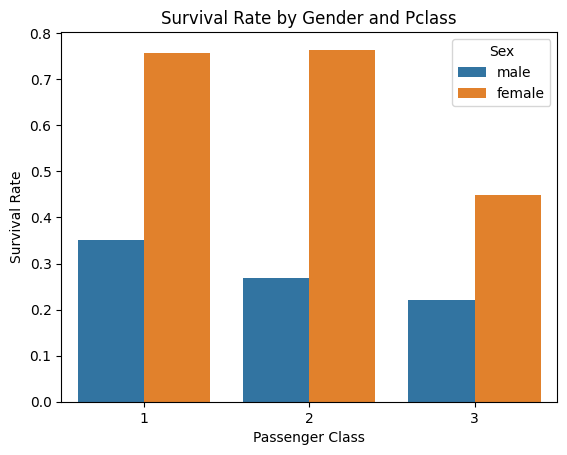

In [201]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, errorbar=None)
plt.title('Survival Rate by Gender and Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [202]:
data_types = df.dtypes

print(data_types)


PassengerId      int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
Sex             object
dtype: object


In [203]:
df['Ticket'] = pd.to_numeric(df['Ticket'], errors='coerce')

# Convert the 'Ticket' column to integers and fill NaN values with 0 (or drop them)
df['Ticket'] = df['Ticket'].fillna(0).astype(int)


In [190]:
df= pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0


In [194]:
default_age_value = -1
df['Age'] = df['Age'].fillna(default_age_value)

In [ ]:
default_age_value = -1
df['Age'] = df['Age'].fillna(default_age_value)

In [195]:
print(df.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
Sex_male          0
dtype: int64


In [192]:
from sklearn.impute import SimpleImputer

# Impute missing values in the entire dataset
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

df['Age'].fillna(np.nan)
df['Fare'].fillna(np.nan)

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
1304    13.0000
1305    30.0000
1306    23.4500
1307    30.0000
1308     7.7500
Name: Fare, Length: 1309, dtype: float64

In [193]:
print(df.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
Sex_male          0
dtype: int64


In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = df["Survived"]

X = df[["Pclass", "Sex_male", "SibSp", "Parch","Ticket"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
pre=pd.DataFrame({
  'Pclass':[3,1],
    'Sex_male':[1,0],
    'SibSp':[1,1],
    'Parch':[0,0],
    'Ticket':[330911,363272]
})
predictions = model.predict(pre)
pre['Survived']=predictions
mapping = {0: 'No', 1: 'Yes'}
pre['Survived']=pre['Survived'].map(mapping)
pre.head()

,Pclass,Sex_male,SibSp,Parch,Ticket,Survived
0,3,1,1,0,330911,No
1,1,0,1,0,363272,Yes
